In [3]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

from utils import load_dataset, compute_performance_metrics, print_metrics_summary

In [4]:
x_train, x_test, y_train, y_test = load_dataset()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(382646, 243) (382646,)
(97300, 243) (97300,)


Em seguida, vamos testar o classificador Random Forest:

Primeiramente começamos com um configuração simples, para que possamos usar o classificador mais simples possível como base para o nosso experimento:

In [6]:
classifier = RandomForestClassifier(n_estimators=10, max_depth=5)

In [7]:
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [8]:
y_pred = classifier.predict(x_test)
y_pred_proba = classifier.predict_proba(x_test)

Com a matriz de confusão, podemos verificar que essa primeira configuração tem uma boa acurácia para o conjunto da classe "1", no entanto a classe "0" que é mais numerosa tem um desempenho pior, o que causa uma dimunuição na acurácia geral, e uma quantidade maior de falsos positivos.

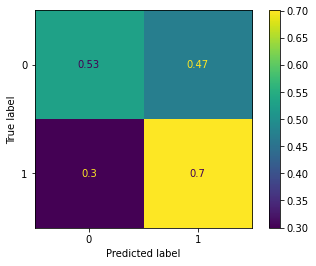

In [31]:
plot_confusion_matrix(classifier, x_test, y_test, normalize="true")

Já para o valor do teste KS, temos um valor reduzido, o que pode indicar que o classificador inicial não "separa" bem as duas classes.

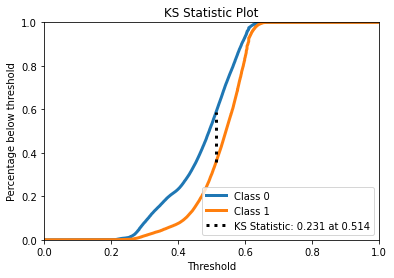


Accuracy:         0.5880
Recall:           0.7004
Precision:        0.4387
F1:               0.5395
AUROC:            0.6632
AUPR:             0.4866


In [11]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, testamos aumentar o número de estimadores:

In [12]:
classifier1 = RandomForestClassifier(n_estimators=50, max_depth=5)

In [13]:
classifier1.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [14]:
y_pred = classifier1.predict(x_test)
y_pred_proba = classifier1.predict_proba(x_test)

Aumentando apenas a quantidade de estimadores, tivemos uma pequena perda na acurácia para a classe "1", mas tivemos também uma pequena melhora na acurácia para a classe "0", o que ocasionou também uma pequena melhor na acurácia geral e no teste KS.

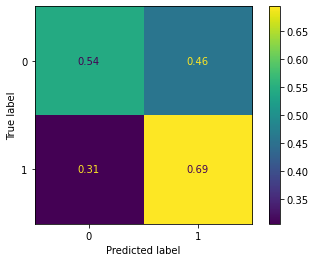

In [30]:
plot_confusion_matrix(classifier1, x_test, y_test, normalize="true")

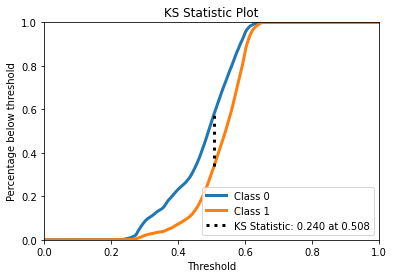


Accuracy:         0.5948
Recall:           0.6941
Precision:        0.4437
F1:               0.5414
AUROC:            0.6691
AUPR:             0.4961


In [16]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, testamos aumentar o parâmetro `max_depth`, que dita o altura máxima para as arvores, geradas, árvores maiores tem capacidade de aprender mais caractéristicas:

In [17]:
classifier2 = RandomForestClassifier(n_estimators=50, max_depth=20)

In [18]:
classifier2.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50)

In [19]:
y_pred = classifier2.predict(x_test)
y_pred_proba = classifier2.predict_proba(x_test)

Ao aumentar o `max_depth`, tivemos uma inversão na situação para a matriz de confusão, agora a classe "0" tem uma acurácia melhor e a classe "1", menor. No entanto a acurácia na classe "1" está maior que a anterior da classe "0", isso causou com que tanto a acurácia geral, quanto o teste KS tivessem um valor melhor.

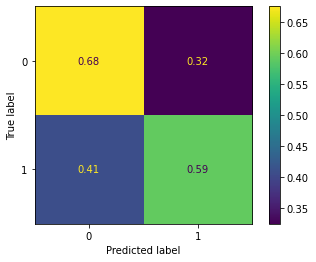

In [32]:
plot_confusion_matrix(classifier2, x_test, y_test,normalize="true")

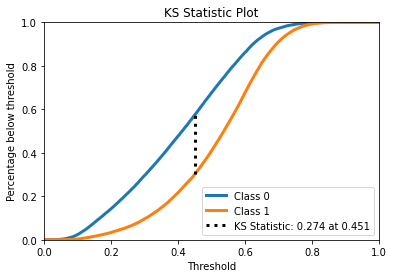


Accuracy:         0.6466
Recall:           0.5911
Precision:        0.4894
F1:               0.5355
AUROC:            0.6876
AUPR:             0.5129


In [20]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, testamos variar o parâmetro `min_samples_leaf`, que dita a minima quantidade samples para que um nós da árvore seja considerado uma folha, aumentando esse parâmetros tentamos "simplificar" o nosso modelo, para evitar overfitting:

In [25]:
classifier3 = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=200)

In [33]:
classifier3.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=200, n_estimators=50)

In [34]:
y_pred = classifier3.predict(x_test)
y_pred_proba = classifier3.predict_proba(x_test)

Obtivemos uma melhor na acurácia da classe "1", no entanto houve uma piora para a classe "0", no entanto houve um balanceamento melhor entre as classes, o que melhorou o valor para a curva KS, mas piorou a acurácia.

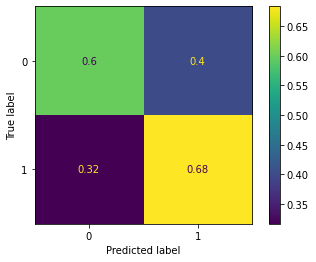

In [35]:
plot_confusion_matrix(classifier3, x_test, y_test,normalize="true")

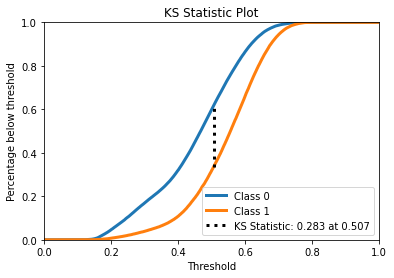


Accuracy:         0.6279
Recall:           0.6834
Precision:        0.4724
F1:               0.5587
AUROC:            0.6950
AUPR:             0.5283


In [36]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, testamos variar o parâmetro `max_features`, aumentamos para considerar 40% das features para encontrar o melhor split, invés de usar a raiz quadrada da quantidade total de features, valor default para o parâmetro.

In [37]:
classifier4 = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=200, max_features=.4)

In [38]:
classifier4.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.4, min_samples_leaf=200,
                       n_estimators=50)

In [39]:
y_pred = classifier4.predict(x_test)
y_pred_proba = classifier4.predict_proba(x_test)

Novamente houve um balanceamento entre a acurácia para a classe "1" e a classe "0", com isso tivemos uma melhora considerável no valor da curva KS.

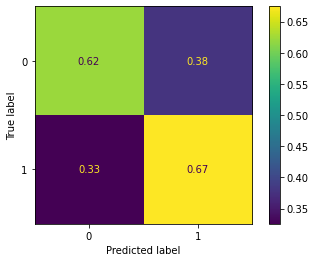

In [40]:
plot_confusion_matrix(classifier4, x_test, y_test, normalize="true")

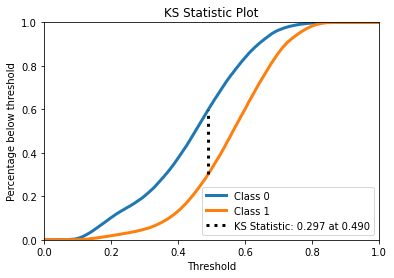


Accuracy:         0.6402
Recall:           0.6745
Precision:        0.4842
F1:               0.5637
AUROC:            0.7046
AUPR:             0.5425


In [41]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, experimentamos variar o parâmetro `criterion` de "gini" para "entropy", essa parâmetro dita a função utilizada para determinar a qualidade de uma separação nas árvores de decisão.

In [42]:
classifier5 = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=200, max_features=.4, criterion="entropy")

In [43]:
classifier5.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=0.4,
                       min_samples_leaf=200, n_estimators=50)

In [44]:
y_pred = classifier5.predict(x_test)
y_pred_proba = classifier5.predict_proba(x_test)

Nesse caso houve uma pequena melhora na acurácia para a classe "1", o que também desencadeou em uma pequena melhor na estátistica KS.

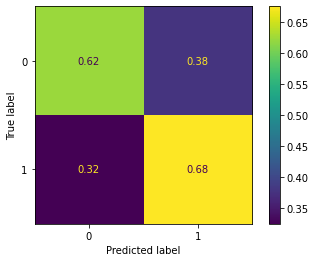

In [45]:
plot_confusion_matrix(classifier5, x_test, y_test, normalize="true")

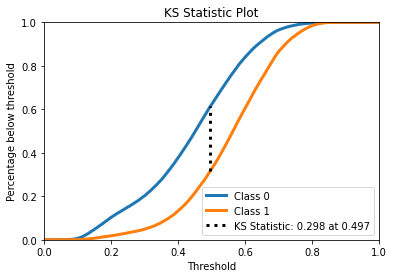


Accuracy:         0.6403
Recall:           0.6752
Precision:        0.4842
F1:               0.5640
AUROC:            0.7044
AUPR:             0.5411


In [46]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Testamos novamente aumentar a quantidade de estimadores usando o parâmetro `n_estimators`, agora usando a melhor configuração dos outros parâmetros alcançada até agora.

In [47]:
classifier6 = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=200, max_features=.4, criterion="entropy")

In [48]:
classifier6.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=0.4,
                       min_samples_leaf=200)

Nesse caso, a variação não obteve nenhuma melhora no nosso desempenho, a acurácia e a estátistica KS, continuaram com práticamente o mesmo valor, o que não justifica o aumento da quantidade de estimadores.

In [49]:
y_pred = classifier6.predict(x_test)
y_pred_proba = classifier6.predict_proba(x_test)

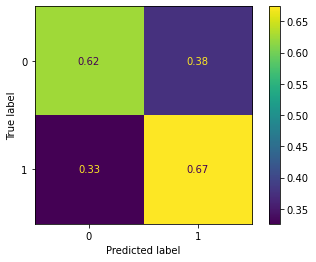

In [50]:
plot_confusion_matrix(classifier6, x_test, y_test, normalize="true")

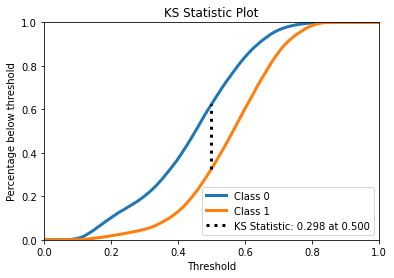


Accuracy:         0.6412
Recall:           0.6738
Precision:        0.4851
F1:               0.5641
AUROC:            0.7055
AUPR:             0.5435


In [51]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, tentamos aumentar o parâmetro `max_depth` novamente, com os outros parâmetros atualizados:

In [57]:
classifier7 = RandomForestClassifier(n_estimators=50, max_depth=25, min_samples_leaf=200, max_features=.4, criterion="entropy")

In [58]:
classifier7.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, max_features=0.4,
                       min_samples_leaf=200, n_estimators=50)

In [59]:
y_pred = classifier7.predict(x_test)
y_pred_proba = classifier7.predict_proba(x_test)

Também não houve uma melhora considerável no resultado, o que não que justifica o aumento do parâmetro.

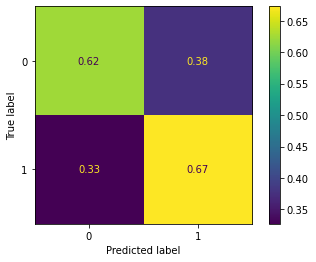

In [60]:
plot_confusion_matrix(classifier7, x_test, y_test, normalize="true")

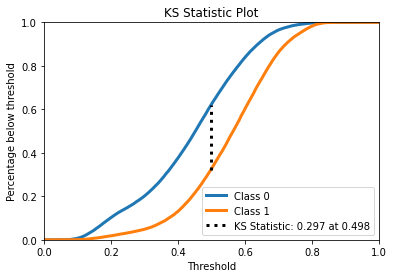


Accuracy:         0.6407
Recall:           0.6730
Precision:        0.4846
F1:               0.5635
AUROC:            0.7049
AUPR:             0.5429


In [61]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)